In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

%matplotlib inline

/home/ubuntu/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Histogram of Oriented Gradients (HOG)

#### 1. Explain how (and identify where in your code) you extracted HOG features from the training images.

Data Exploration

In [5]:
""" Utils """
def load_images():
    # Divide up into cars and notcars
    images = glob.glob('images/test/*.jpeg')
    cars = []
    notcars = []
    for image in images:
        if 'extra' in image:
            notcars.append(image)
        else:
            cars.append(image)  
    return cars, notcars

def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))
                        
def color_hist(img, nbins=32):    #bins_range=(0, 256)
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features


In [32]:
def random_img(arr):
    # Generate a random index to look at a car image
    ind = np.random.randint(0, len(arr))
    # Read in the image
    img = mpimg.imread(arr[ind])
    return img

def test_random_hog(arr):
    img = random_img(arr)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Define HOG parameters
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    # Call our function with vis=True to see an image output
    features, hog_img = get_hog_features(gray, orient, 
                            pix_per_cell, cell_per_block, 
                            vis=True, feature_vec=False)
    return img, hog_img

In [33]:
def test_random_car_and_notcar(cars, notcars):
    
    car_img = random_img(cars)
    notcar_img = random_img(notcars)

    fig = plt.figure(figsize=(20,20))
    plt.subplot(121)
    plt.imshow(car_img)
    plt.title('Example Car Image')
    plt.subplot(122)
    plt.imshow(notcar_img)
    plt.title('Example None-Car Image')
    

def test_hog_random_car_and_notcar(cars, notcars):
    
    car_img, car_hog_img = test_random_hog(cars)
    notcar_img, notcar_hog_img = test_random_hog(notcars)


    # Plot the examples|
    fig = plt.figure(figsize=(20,20))
    plt.subplot(141)
    plt.imshow(car_img, cmap='gray')
    plt.title('Example Car Image')
    plt.subplot(142)
    plt.imshow(car_hog_img, cmap='gray')
    plt.title('HOG Visualization')
    plt.subplot(143)
    plt.imshow(notcar_img, cmap='gray')
    plt.title('Example None-Car Image')
    plt.subplot(144)
    plt.imshow(notcar_hog_img, cmap='gray')
    plt.title('HOG Visualization')    

In [34]:
cars, notcars = load_images()


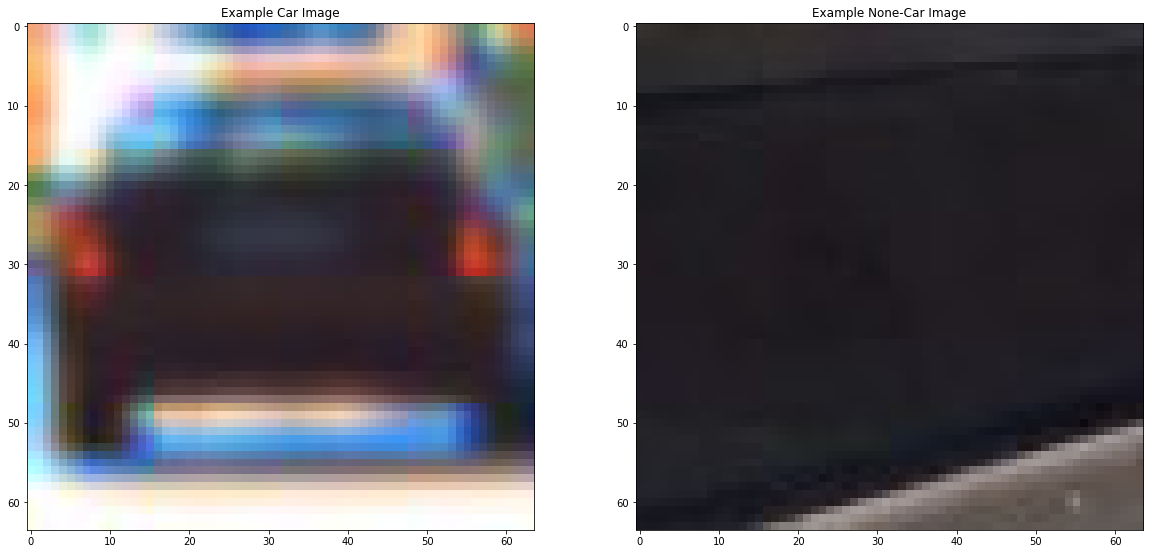

In [35]:
test_random_car_and_notcar(cars, notcars)

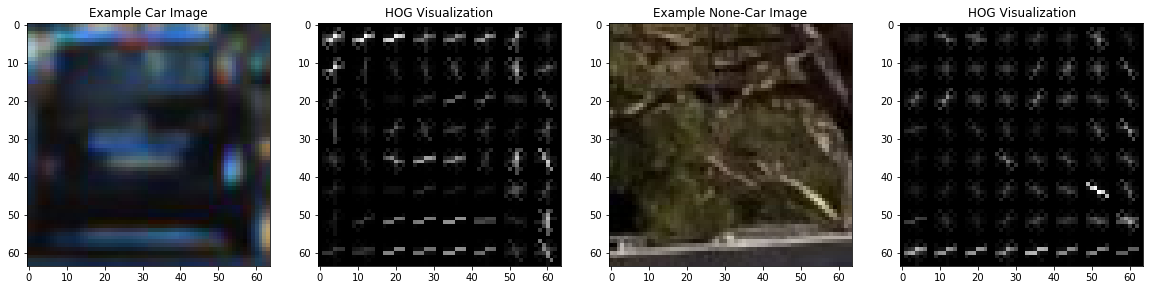

In [36]:

test_hog_random_car_and_notcar(cars, notcars)